In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
## print(diabetes['DESCR'])

In [4]:
predictors = diabetes['data']
target = diabetes['target']


In [5]:
target.shape

(442,)

In [6]:
# 2eme facon pour acceder aux donnees
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [7]:
diabetes_y.shape

(442,)

In [8]:
diabetes_X.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [9]:
diabetes_y.head(10)

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
6    138.0
7     63.0
8    110.0
9    310.0
Name: target, dtype: float64

In [10]:
diabetes_y.columns = ['Disease progression']

In [11]:
diabetes_y.columns

['Disease progression']

#### EDA

In [12]:
diabetes_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [13]:
diabetes_y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [14]:
diabetes_X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [15]:
diabetes_X.duplicated().sum()

0

In [16]:
diabetes_X['sex'].unique()

array([ 0.05068012, -0.04464164])

<Axes: >

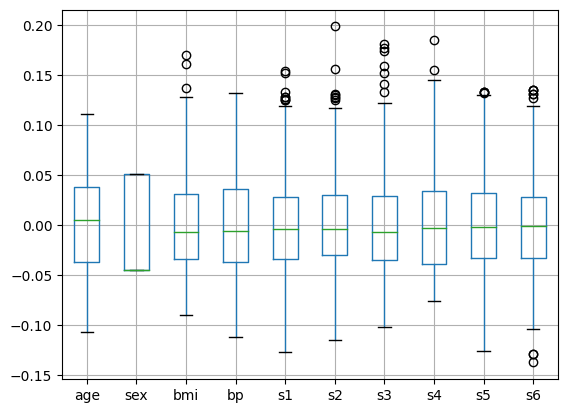

In [17]:
diabetes_X.boxplot()

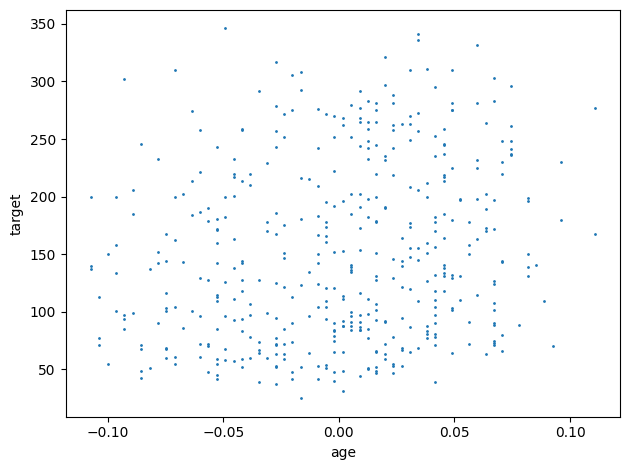

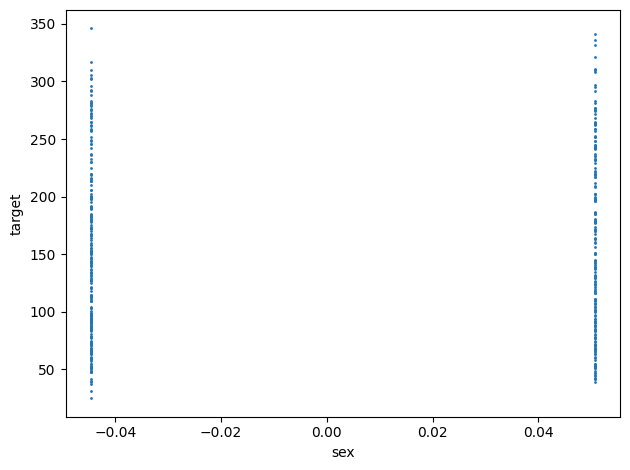

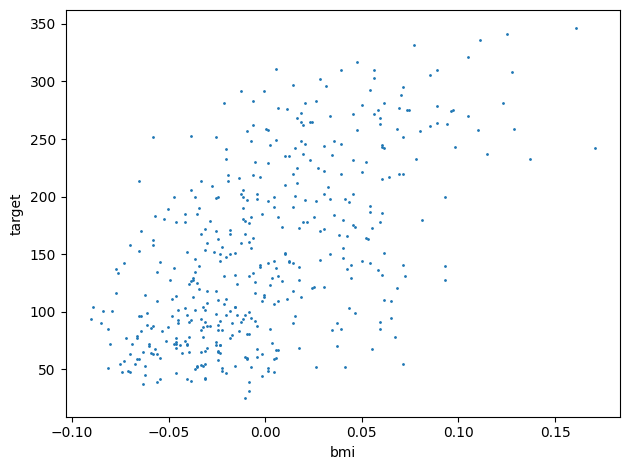

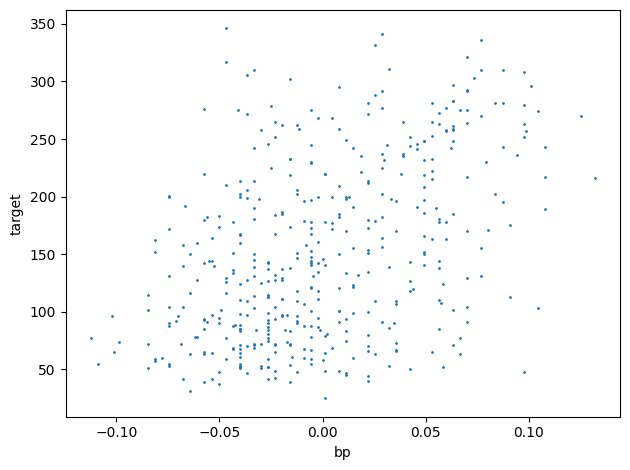

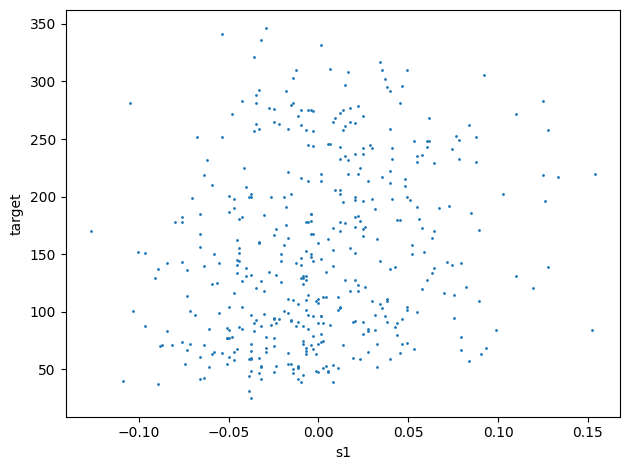

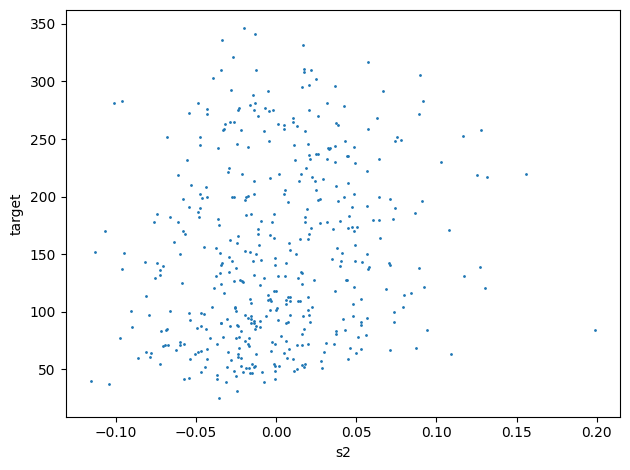

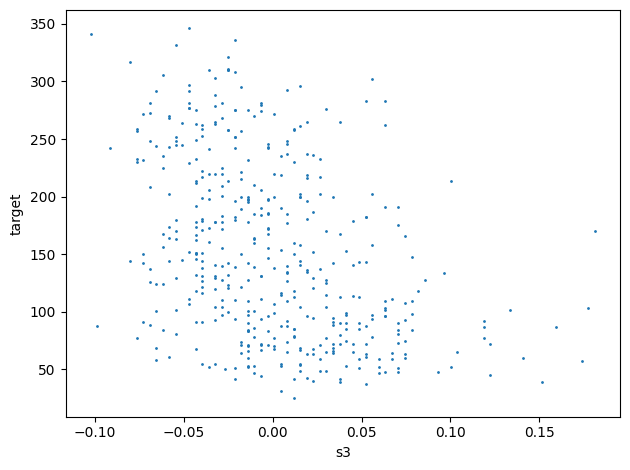

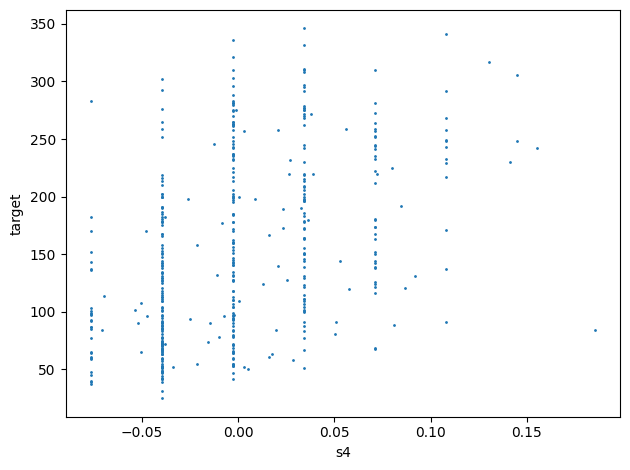

In [18]:
for i in range(8):
    feature = pd.DataFrame(diabetes_X.iloc[:,i])
    plt.scatter(feature, diabetes_y, s=1)
    plt.xlabel(diabetes_X.columns.values[i])
    plt.ylabel('target')
    plt.tight_layout()
    plt.show()

In [19]:
sns.heatmap(diabetes_X.corr())

<Axes: >

In [20]:
# Il n' y a pas de correlation entre sex et le label, donc on le remove
diabetes_X.drop(['sex', 'age'], axis=1,inplace=True)

In [21]:
diabetes_X.columns

Index(['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [22]:
# Diviser les donnees entre apprentissage et test
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=42)

In [24]:
# On cree un objet du model
regr = linear_model.LinearRegression()

In [25]:
# Entraînez le modèle à l'aide des ensembles d'entraînement
regr.fit(X_train, y_train)

LinearRegression()

In [26]:
# Faire des prédictions à l'aide de l'ensemble de test
diabetes_y_pred = regr.predict(X_test)

In [27]:
diabetes_y_pred

array([128.90702757, 169.95246924, 146.45016118, 265.10454477,
       133.33715556,  85.76375432, 275.78273428, 195.8435415 ,
        98.71264745, 127.17805184,  89.18027263, 149.96880462,
        51.60673064, 212.75436282, 111.46230447, 145.07637203,
       228.5175945 , 256.80458822, 208.87953591, 227.40020784,
       198.13518587,  78.03265368,  64.12879879, 198.66798437,
       152.49306523, 170.00210111, 202.11403156, 184.28915736,
        43.87249126, 121.4265748 , 168.09514027,  81.10238755,
       145.35756488, 189.14583181, 159.60962305, 211.89628315,
       133.94839178, 128.94214021, 151.65372378,  51.35593714,
        62.46992536, 120.93044697, 171.57335811, 152.96348124,
       156.1590175 ,  58.56414068,  67.37795246, 104.36299289,
        43.90221458, 157.8287804 , 149.70218753,  57.73458358,
       114.20326904,  99.26202361, 182.42873284, 153.55103788,
        84.99647183, 221.30718389, 113.58802663,  70.44664142,
       175.85750238, 195.82393612, 160.22936557, 118.84

In [28]:
# Les coefficients
print("Coefficients: \n", regr.coef_)
# Le mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
# Le coefficient of determination: 1 est une prediction perfecte
print("Coefficient de determination: %.2f" % r2_score(y_test, diabetes_y_pred))

Coefficients: 
 [ 594.11309516  342.91763026 -819.82590898  471.84005726  137.40045262
  181.31779167  675.11160145   34.43533325]
Mean squared error: 2871.19
Coefficient de determination: 0.47


In [29]:
diabetes_X.columns

Index(['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

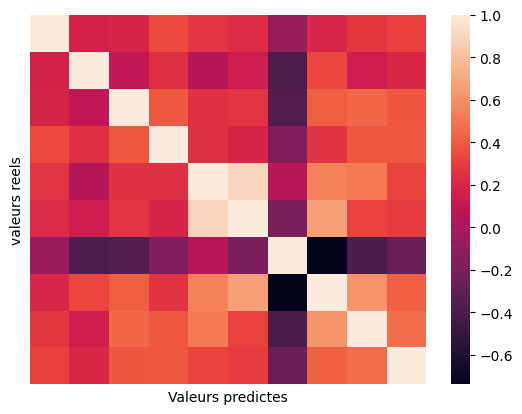

In [30]:
plt.scatter(diabetes_y_pred,y_test, color="black")
plt.xlabel('Valeurs predictes')
plt.ylabel('valeurs reels')
plt.xticks(())
plt.yticks(())

plt.show()

**EXERCICE TITANIC**

In [31]:
import pandas as pd

In [32]:
titanic_data = pd.read_csv('titanic.csv')

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


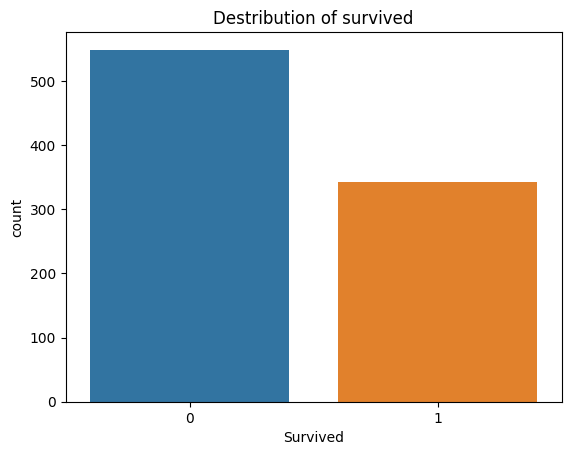

In [34]:
# Visualize the distribution of 'Survived' using a count plot
sns.countplot(x='Survived', data=titanic_data)
plt.title('Destribution of survived')
plt.show()

In [35]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
#We fill missing values in the 'Age' column with the median age using .fillna()

titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True) 

In [37]:
# We fill missing values in the 'Embarked' column with the most frequent value using .mode().
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [38]:
# We convert categorical features 'Sex' and 'Embarked' into numerical using one-hot encoding with pd.get_dummies().
# We use the drop_first=True parameter to drop the first category for each encoded feature, reducing multicollinearity.
# We create the feature matrix X by dropping the 'Survived', 'PassengerId', 'Name', 'Ticket', and 'Cabin' columns from the dataset.
# We create the target array y containing the 'Survived' column values.

titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)


In [39]:
#Split the data 
X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data['Survived']

In [40]:
# We import train_test_split from scikit-learn to split the data into training and testing sets.
# We split the data into training and testing sets using a test size of 20% and a random state of 42 for reproducibility.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

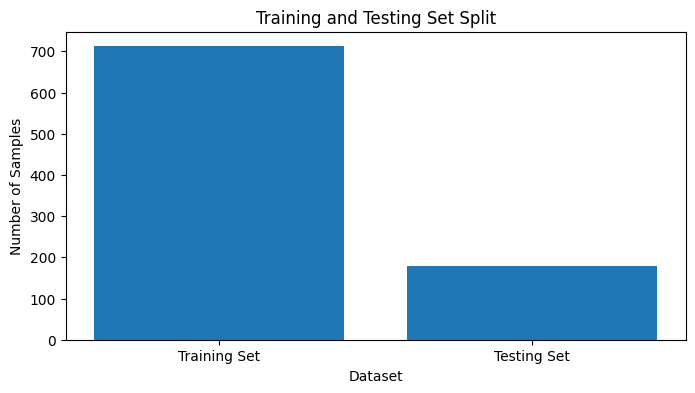

In [41]:
plt.figure(figsize=(8, 4))
plt.bar(['Training Set', 'Testing Set'], [len(X_train), len(X_test)])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Training and Testing Set Split')
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/gobi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7988826815642458
Confusion Matrix:
 [[89 16]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

